Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же коэффициента детерминации $r^2$. Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке.

Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.

In [63]:
import numpy as np                           
from sklearn import cross_validation, metrics
import pandas as pd
import matplotlib.pyplot as plt
from skimage import transform
from IPython.display import display, Math


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_regressor = LinearRegression() #переназовем для удобства 

In [65]:
from sklearn.datasets import load_boston    # загружаем данные из модуля
boston = load_boston() 

In [66]:
print(boston.DESCR)     # изучаем характер данных по документации

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [67]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target     #целевой столбец с ценами на жилье         

In [68]:
bos.head()          # выведем небольшую часть данных, чтобы изучить их характер

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
X = bos.drop('PRICE', axis = 1)  #разделяем данные на множества объектов и ответов
Y = bos['PRICE']
print('размер выборки ', len(X))

размер выборки  506


In [70]:
X.head() # выводим часть данных, по которым будем обучаться

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.3) #разбиваем данные на тест и обучение

In [72]:
linear_regressor.fit(X_train, Y_train)      #обучаем модель
predictions = linear_regressor.predict(X_test)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

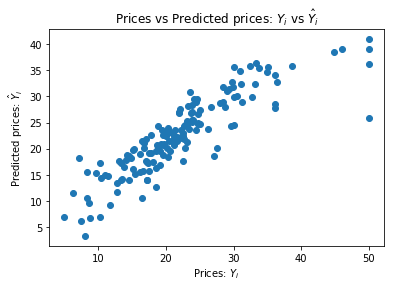

In [73]:
plt.scatter(Y_test, predictions)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Изучим зависимости качества обучения от глубины обучающей выборки

In [74]:
def Experimental_deep_function(percent):
    X_part, X_rubbish, Y_part, Y_rubbish = cross_validation.train_test_split(X, Y, test_size = percent)
    scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
    linear_scoring_mae = cross_validation.cross_val_score(linear_regressor, X_part, Y_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = mae mean: {}, std = {}'.format(linear_scoring_mae.mean(), linear_scoring_mae.std()))
    
    scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = True)
    linear_scoring_mse = cross_validation.cross_val_score(linear_regressor, X_part, Y_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = mse mean: {}, std = {}'.format(linear_scoring_mse.mean(), linear_scoring_mse.std()))
    
    scorer = metrics.make_scorer(metrics.r2_score, greater_is_better = True)
    linear_scoring_r2 = cross_validation.cross_val_score(linear_regressor, X_part, Y_part, scoring = scorer, 
                                                  cv = 10)
    #print('метрика = r2 mean: {}, std = {}'.format(linear_scoring_r2.mean(), linear_scoring_r2.std()))
    
    del X_part, X_rubbish, Y_part, Y_rubbish
    return(linear_scoring_mae.mean(), linear_scoring_mse.mean(), linear_scoring_r2.mean(), linear_scoring_mae.std(),
           linear_scoring_mse.std(), linear_scoring_r2.std())

In [75]:
MAE, MSE, R2 = [], [], []
MAE_STD, MSE_STD, R2_STD = [], [], []
for percent in np.arange(0, 0.95, 0.005):
    MAE.append(Experimental_deep_function(percent)[0])
    MSE.append(Experimental_deep_function(percent)[1])
    R2.append(Experimental_deep_function(percent)[2])
    MAE_STD.append(Experimental_deep_function(percent)[3])
    MSE_STD.append(Experimental_deep_function(percent)[4])
    R2_STD.append(Experimental_deep_function(percent)[5])

Text(0.5,1,'Зависимость функционала ошибки MAE, MSE, $r^2$ от глубины выборки')

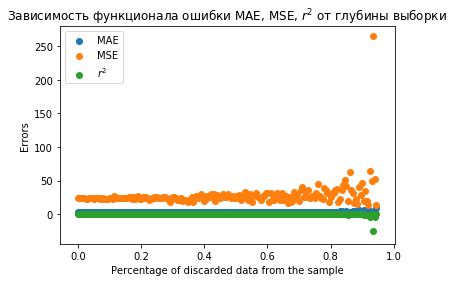

In [76]:
percent = np.arange(0, 0.95, 0.005)

plt.scatter(percent, MAE, label = 'MAE')
plt.scatter(percent, MSE, label = 'MSE')
plt.scatter(percent, R2, label = '$r^2$')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("Errors")
plt.legend()
plt.title("Зависимость функционала ошибки MAE, MSE, $r^2$ от глубины выборки")

Text(0.5,1,'Зависимость функционала ошибки MAE_STD, MSE_STD, $r^2 STD$ от глубины выборки')

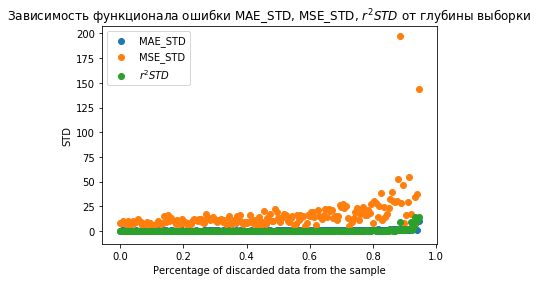

In [77]:
plt.scatter(percent, MAE_STD, label = 'MAE_STD')
plt.scatter(percent, MSE_STD, label = 'MSE_STD')
plt.scatter(percent, R2_STD, label = '$r^2 STD$')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("STD")
plt.legend()
plt.title("Зависимость функционала ошибки MAE_STD, MSE_STD, $r^2 STD$ от глубины выборки")

## MAE

Text(0.5,1,'Зависимость функционала ошибки MAE от глубины выборки')

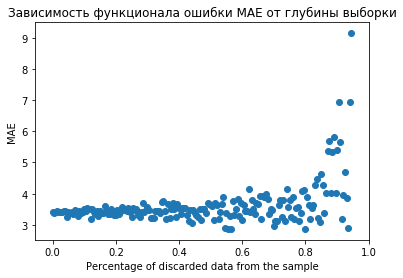

In [78]:
plt.scatter(percent, MAE, label = 'MAE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MAE")
plt.title("Зависимость функционала ошибки MAE от глубины выборки")

Text(0.5,1,'Зависимость функционала MAE_STD от глубины выборки')

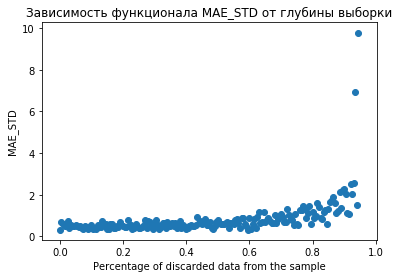

In [79]:
plt.scatter(percent, MAE_STD, label = 'MAE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MAE_STD")
plt.title("Зависимость функционала MAE_STD от глубины выборки")

## MSE

Text(0.5,1,'Зависимость функционала ошибки MSE от глубины выборки')

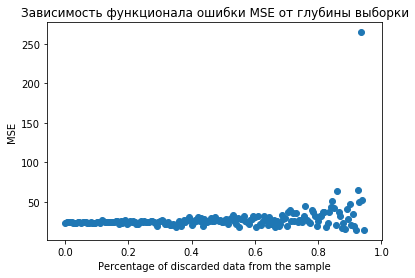

In [80]:
plt.scatter(percent, MSE, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MSE")
plt.title("Зависимость функционала ошибки MSE от глубины выборки")

Text(0.5,1,'Зависимость функционала MSE_STD от глубины выборки')

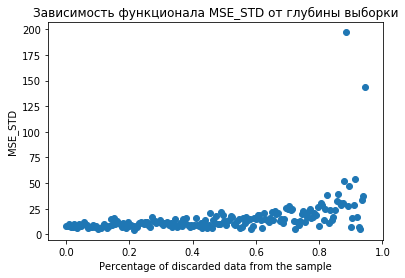

In [81]:
plt.scatter(percent, MSE_STD, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("MSE_STD")
plt.title("Зависимость функционала MSE_STD от глубины выборки")

## $R^2$

Text(0.5,1,'Зависимость функционала ошибки R2 от глубины выборки')

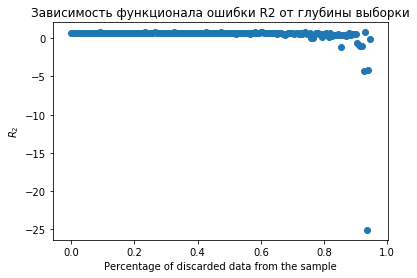

In [82]:
plt.scatter(percent, R2, label = 'R2')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("$R_2$")
plt.title("Зависимость функционала ошибки R2 от глубины выборки")

Text(0.5,1,'Зависимость функционала R2_STD от глубины выборки')

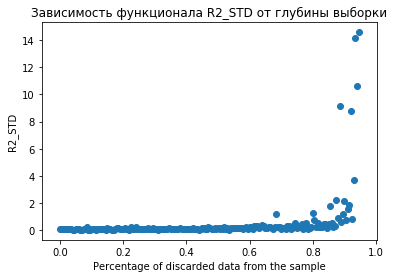

In [83]:
plt.scatter(percent, R2_STD, label = 'MSE')
plt.xlabel("Percentage of discarded data from the sample")
plt.ylabel("R2_STD")
plt.title("Зависимость функционала R2_STD от глубины выборки")

### Вывод

В ходе работы было установлено, что качество решения задачи регрессии падает с уменьшением глубины выборки. Зависисмость функционалов ошибок от глубины выборки представлены в работе выше.